# Agrupar y agregar (group by and aggregate)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Flavors.csv")
df

,Flavor,Base Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
0,Mint Chocolate Chip,Vanilla,Yes,10.0,8.0,18.0
1,Chocolate,Chocolate,Yes,8.8,7.6,16.6
2,Vanilla,Vanilla,No,4.7,5.0,9.7
3,Cookie Dough,Vanilla,Yes,6.9,6.5,13.4
4,Rocky Road,Chocolate,Yes,8.2,7.0,15.2
5,Pistachio,Vanilla,No,2.3,3.4,5.7
6,Cake Batter,Vanilla,Yes,6.5,6.0,12.5
7,Neapolitan,Vanilla,No,3.8,5.0,8.8
8,Chocolte Fudge Brownie,Chocolate,Yes,8.2,7.1,15.3


In [5]:
# agrupar por sabor base (base flavor)

group_by_frame = df.groupby('Base Flavor')

In [6]:
group_by_frame.mean()

C:\Users\tinch\AppData\Local\Temp\ipykernel_15740\4024548864.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_by_frame.mean()


,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,
Chocolate,8.4,7.233333,15.70
Vanilla,5.7,5.650000,11.35


In [8]:
df.groupby('Base Flavor').mean() # igual que lo anterior pero en una sola linea de codigo

C:\Users\tinch\AppData\Local\Temp\ipykernel_15740\2409314591.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Base Flavor').mean()


,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,
Chocolate,8.4,7.233333,15.70
Vanilla,5.7,5.650000,11.35


In [10]:
df.groupby('Base Flavor').count() # conteo

,Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,,,
Chocolate,3,3,3,3,3
Vanilla,6,6,6,6,6


In [11]:
df.groupby('Base Flavor').min() # el primer valor que devuelve es el minimo

,Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,,,
Chocolate,Chocolate,Yes,8.2,7.0,15.2
Vanilla,Cake Batter,No,2.3,3.4,5.7


In [12]:
df.groupby('Base Flavor').max() # idem pero con los maximos

,Flavor,Liked,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,,,
Chocolate,Rocky Road,Yes,8.8,7.6,16.6
Vanilla,Vanilla,Yes,10.0,8.0,18.0


In [13]:
df.groupby('Base Flavor').sum() # suma

C:\Users\tinch\AppData\Local\Temp\ipykernel_15740\1221781544.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Base Flavor').sum()


,Flavor Rating,Texture Rating,Total Rating
Base Flavor,,,
Chocolate,25.2,21.7,47.1
Vanilla,34.2,33.9,68.1


# Agregar (aggregate)

In [15]:
df.groupby('Base Flavor').agg({'Flavor Rating':['mean','max','count','sum'],'Texture Rating':['mean','max','count','sum']})

Flavor Rating                   Texture Rating                 
                     mean   max count   sum           mean  max count   sum
Base Flavor                                                                
Chocolate             8.4   8.8     3  25.2       7.233333  7.6     3  21.7
Vanilla               5.7  10.0     6  34.2       5.650000  8.0     6  33.9

In [16]:
df.groupby(['Base Flavor','Liked']).mean()

C:\Users\tinch\AppData\Local\Temp\ipykernel_15740\2854014148.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Base Flavor','Liked']).mean()


Flavor Rating  Texture Rating  Total Rating
Base Flavor Liked                                             
Chocolate   Yes              8.4        7.233333     15.700000
Vanilla     No               3.6        4.466667      8.066667
            Yes              7.8        6.833333     14.633333

In [17]:
df.groupby('Base Flavor').describe()

Flavor Rating                                             \
                    count mean       std  min    25%  50%  75%   max   
Base Flavor                                                            
Chocolate             3.0  8.4  0.346410  8.2  8.200  8.2  8.5   8.8   
Vanilla               6.0  5.7  2.710719  2.3  4.025  5.6  6.8  10.0   

            Texture Rating            ...             Total Rating         \
                     count      mean  ...    75%  max        count   mean   
Base Flavor                           ...                                   
Chocolate              3.0  7.233333  ...  7.350  7.6          3.0  15.70   
Vanilla                6.0  5.650000  ...  6.375  8.0          6.0  11.35   

                                                         
                  std   min     25%   50%     75%   max  
Base Flavor                                              
Chocolate    0.781025  15.2  15.250  15.3  15.950  16.6  
Vanilla      4.263684   5.7   9.025  11.1  13.175  18.0  

[2 rows x 24 columns]

# Merge, join and concatenate

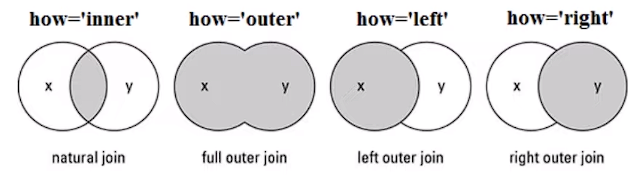

In [3]:
from IPython.display import Image
Image("joins.png")

<code>Natural (inner) join</code> devuelve los valores que coinciden en los dataframes X e Y.

<code>Full outer (outer) join</code> devuelve todos los valores que se encuentran tanto en X como en Y y similares.

<code>Left outer (left) join</code> devuelve todos los valores que satisfacen al conjunto o dataframe X.

<code>Right outer (left) join</code> devuelve todos los valores que satisfacen al conjunto o dataframe Y.

## Ejemplos

In [3]:
import pandas as pd

In [4]:
df1 = pd.read_csv("LOTR.csv")
df1

,FellowshipID,FirstName,Skills
0,1001,Frodo,Hiding
1,1002,Samwise,Gardening
2,1003,Gandalf,Spells
3,1004,Pippin,Fireworks


In [5]:
df2 = pd.read_csv("LOTR 2.csv")
df2

,FellowshipID,FirstName,Age
0,1001,Frodo,50
1,1002,Samwise,39
2,1006,Legolas,2931
3,1007,Elrond,6520
4,1008,Barromir,51


Función merge (inner join)

In [6]:
df1.merge(df2) # devuelve los valores donde las claves específicas son iguales. En este caso devolvió 1001 y 1002, que se encuentran tanto en df1 y df2 y coinciden exactamente.

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39


In [7]:
df1.merge(df2, how = "outer") # devuelve todos los valores en ambos sets y agrega NaN (not a number) a los valores que no pudo completar.

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
4,1006,Legolas,NaN,2931.0
5,1007,Elrond,NaN,6520.0
6,1008,Barromir,NaN,51.0


In [8]:
df1.merge(df2, how = "left") # mira a df1 y si hay algo que coincida en df2 entonces lo extrae

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50.0
1,1002,Samwise,Gardening,39.0
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN


In [9]:
df1.merge(df2, how = 'right') # mira a df2 y si hay algo que coincida en df1 entonces lo extrae

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,50
1,1002,Samwise,Gardening,39
2,1006,Legolas,NaN,2931
3,1007,Elrond,NaN,6520
4,1008,Barromir,NaN,51


<code>Merge</code> funciona especialmente bien cuando se trabaja con los índices.

In [12]:
df4 = df1.set_index('FellowshipID').join(df2.set_index('FellowshipID'), lsuffix='_Left',rsuffix='_Right', how='outer')
df4

,FirstName_Left,Skills,FirstName_Right,Age
FellowshipID,,,,
1001,Frodo,Hiding,Frodo,50.0
1002,Samwise,Gardening,Samwise,39.0
1003,Gandalf,Spells,NaN,NaN
1004,Pippin,Fireworks,NaN,NaN
1006,NaN,NaN,Legolas,2931.0
1007,NaN,NaN,Elrond,6520.0
1008,NaN,NaN,Barromir,51.0


# Concatenar dataframes

In [14]:
pd.concat([df1,df2]) # ubica un df arriba de otro

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0


In [15]:
pd.concat([df1,df2], join='inner') # hace un inner join

,FellowshipID,FirstName
0,1001,Frodo
1,1002,Samwise
2,1003,Gandalf
3,1004,Pippin
0,1001,Frodo
1,1002,Samwise
2,1006,Legolas
3,1007,Elrond
4,1008,Barromir


In [16]:
pd.concat([df1,df2], join='outer') # hace un inner join

,FellowshipID,FirstName,Skills,Age
0,1001,Frodo,Hiding,NaN
1,1002,Samwise,Gardening,NaN
2,1003,Gandalf,Spells,NaN
3,1004,Pippin,Fireworks,NaN
0,1001,Frodo,NaN,50.0
1,1002,Samwise,NaN,39.0
2,1006,Legolas,NaN,2931.0
3,1007,Elrond,NaN,6520.0
4,1008,Barromir,NaN,51.0
